<a href="https://colab.research.google.com/github/WilkisterMbaka/House-Sales-Analysis-and-Prediction-Hass-Consulting-Company/blob/main/Moringa_Data_Science_Core_W7_Independent_Project_2022_06_Wilkister_Mbaka_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Prices Analysis and Prediction**

## **1.0 Defining The Question**

**a) Specifying the Question**

1. Study the factors that affect housing prices
2. Build a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

**b) Defining the Metric for Success**

* Exploratory Data Analysis
* Building regression models
    * Multiple Linear Regression
    * Quantile Regression
    * Ridge Regression
    * Lasso Regression
    * Elastic Net Regression
* Model evaluation through cross validation, RMSE Scores, residual plots and Heteroscedascity

**c) Understanding the context**

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

**d) Recording the Experimental Design**

1. Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. Define the appropriateness of the available data to answer the given question.
4. Find and deal with outliers, anomalies, and missing data within the dataset.
5. Perform univariate, bivariate and multivariate analysis recording your observations.
5. Performing regression analysis.
6. Incorporate categorical independent variables into your models.
7. Check for multicollinearity
8. Provide a recommendation based on your analysis. 
9. Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
10. Challenge your solution by providing insights on how you can make improvements in model improvement.

## **2.0 Reading Data**

In [1]:
#importing Libraries

#importing pandas
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib
#
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the Data from the source i.e. csv
#
df = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## **3.0 Checking the Data**

In [3]:
# Check top 5 records
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Check bottom 5 records
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
# Determining the no. of records in our dataset
#
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

Number of rows: 21613 
Number of columns: 20


In [6]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [7]:
#Checking how many unique value are in a column
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [8]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Check for unique values in each column
column_list = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_basement' ]
for col in column_list:
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('**********')
  print('\n')

bedrooms column unique values: 

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
**********


bathrooms column unique values: 

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
**********


floors column unique values: 

[1.  2.  1.5 3.  2.5 3.5]
**********


waterfront column unique values: 

[0 1]
**********


view column unique values: 

[0 3 4 2 1]
**********


condition column unique values: 

[3 5 4 1 2]
**********


grade column unique values: 

[ 7  6  8 11  9  5 10 12  4  3 13  1]
**********


yr_built column unique values: 

[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 

**Observations**
1. Bedrooms has a value of 33 which is too large


## **4.0 Tidying the Dataset**

In [10]:
# dropping the unnecessary columns 
df=df.drop(['id'],axis=1)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [11]:
# Check for missing values in the dataset
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in the dataset

In [12]:
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
4352,259950.0,2,2.00,1070,649,2.0,0,0,3,9,720,350,2008,0,98106,47.5213,-122.357,1070,928
14983,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20524,529500.0,3,2.25,1410,905,3.0,0,0,3,9,1410,0,2014,0,98116,47.5818,-122.402,1510,1352


There are 5 duplicates in this dataset

In [13]:
# Drop duplicates in ranking dataset
df.drop_duplicates(inplace=True)

In [14]:
# Check for duplicates
df.duplicated().sum()

0

In [15]:
# Check the house with 33 bedrooms
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


It is unlikely that this house has 33 bedrooms given the Square feet area of living area. So we will drop this record

In [16]:
# Drop row
df.drop(df[df['bedrooms'] == 33].index, inplace = True)
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


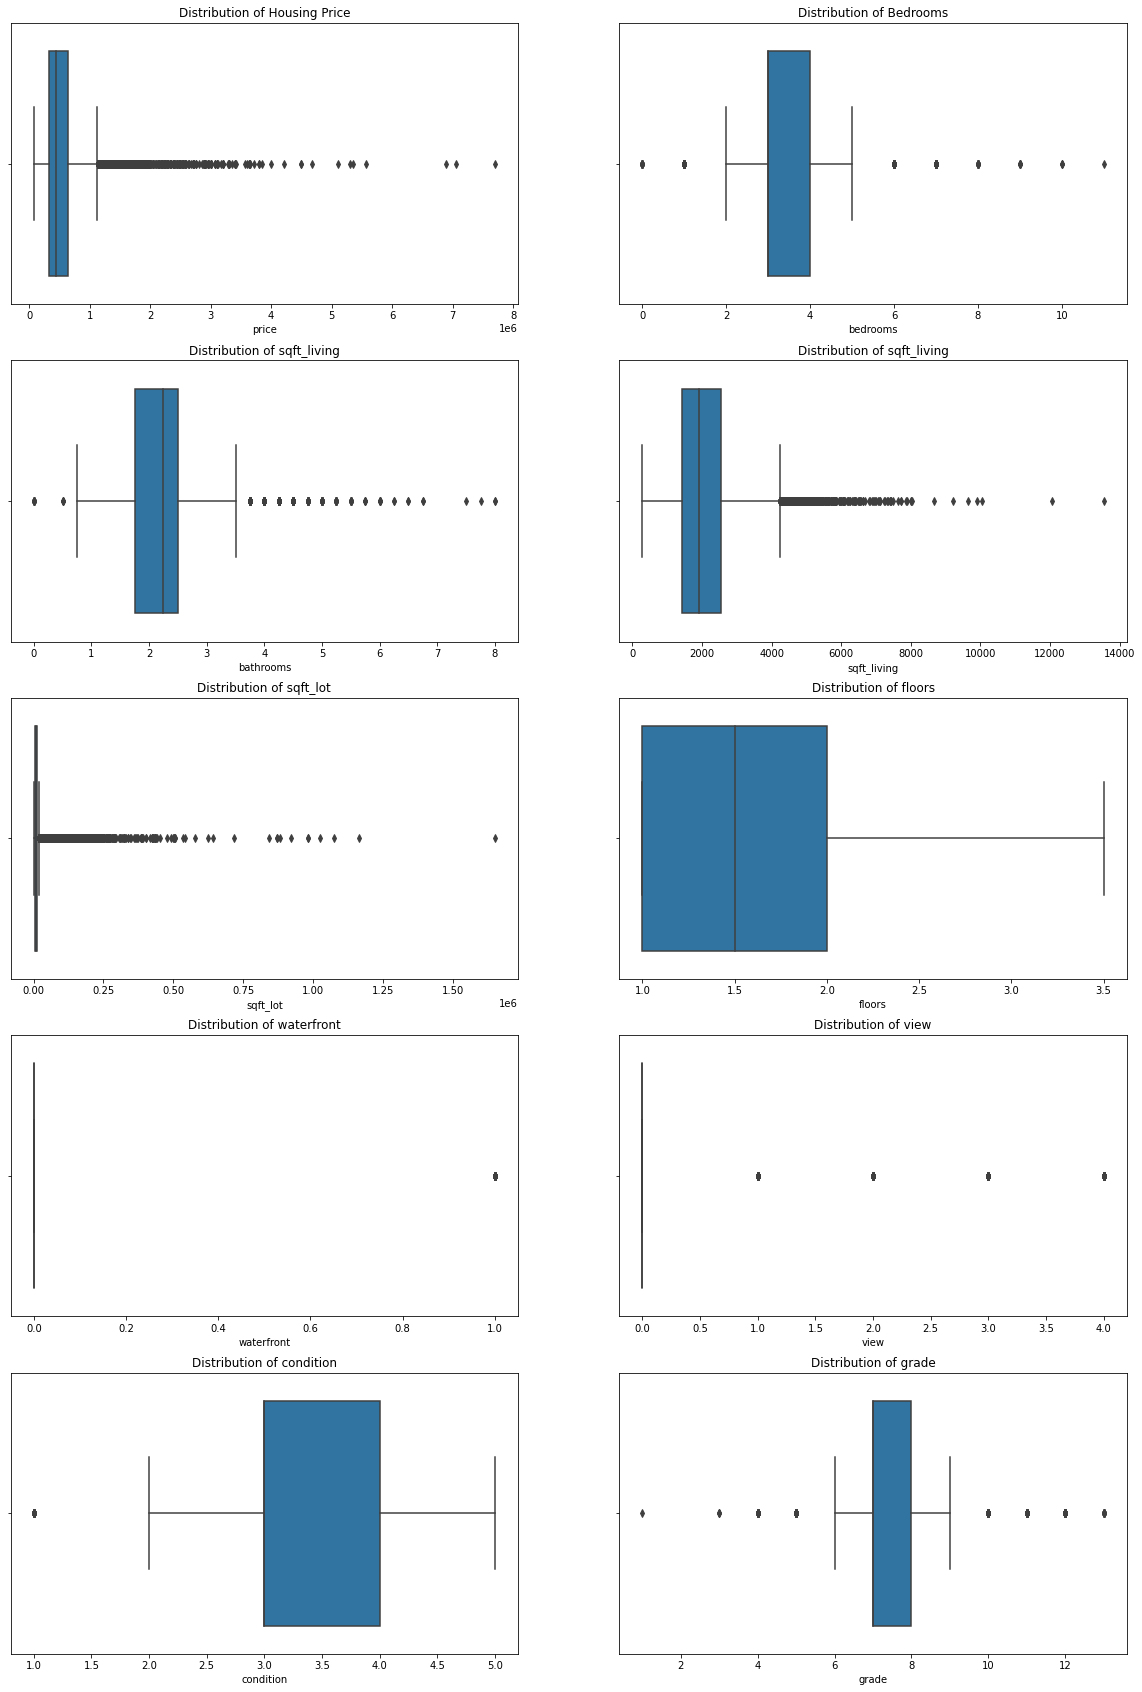

In [17]:
# Check for outliers
fig, ax= plt.subplots(5,2,figsize=[20, 30])

sns.boxplot(data=df, x='price', ax=ax[0,0]).set_title('Distribution of Housing Price')
sns.boxplot(data=df, x='bedrooms', ax=ax[0,1]).set_title('Distribution of Bedrooms')
sns.boxplot(data=df, x='bathrooms', ax=ax[1,0]).set_title('Distribution of sqft_living')
sns.boxplot(data=df, x='sqft_living', ax=ax[1,1]).set_title('Distribution of sqft_living')
sns.boxplot(data=df, x='sqft_lot', ax=ax[2,0]).set_title('Distribution of sqft_lot')
sns.boxplot(data=df, x='floors', ax=ax[2,1]).set_title('Distribution of floors')
sns.boxplot(data=df, x='waterfront', ax=ax[3,0]).set_title('Distribution of waterfront')
sns.boxplot(data=df, x='view', ax=ax[3,1]).set_title('Distribution of view')
sns.boxplot(data=df, x='condition', ax=ax[4,0]).set_title('Distribution of condition')
sns.boxplot(data=df, x='grade', ax=ax[4,1]).set_title('Distribution of grade')
plt.show()



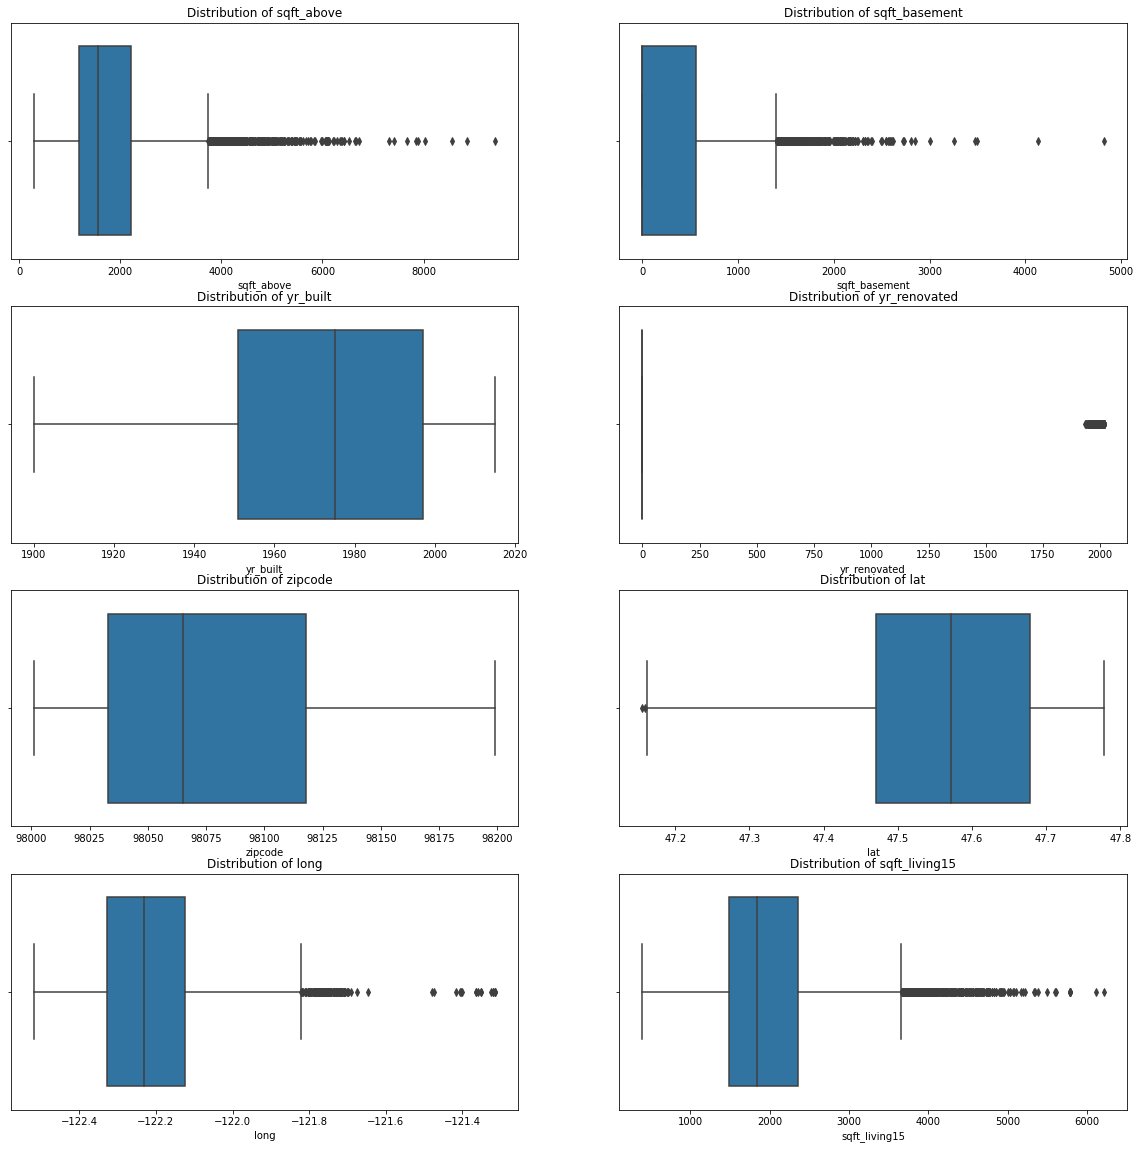

In [18]:
# Check for outliers
fig, ax= plt.subplots(4,2,figsize=[20, 20])

sns.boxplot(data=df, x='sqft_above', ax=ax[0,0]).set_title('Distribution of sqft_above')
sns.boxplot(data=df, x='sqft_basement', ax=ax[0,1]).set_title('Distribution of sqft_basement')
sns.boxplot(data=df, x='yr_built', ax=ax[1,0]).set_title('Distribution of yr_built')
sns.boxplot(data=df, x='yr_renovated', ax=ax[1,1]).set_title('Distribution of yr_renovated')
sns.boxplot(data=df, x='zipcode', ax=ax[2,0]).set_title('Distribution of zipcode')
sns.boxplot(data=df, x='lat', ax=ax[2,1]).set_title('Distribution of lat')
sns.boxplot(data=df, x='long', ax=ax[3,0]).set_title('Distribution of long')
sns.boxplot(data=df, x='sqft_living15', ax=ax[3,1]).set_title('Distribution of sqft_living15')
plt.show()

Text(0.5, 1.0, 'Distribution of sqft_lot15')

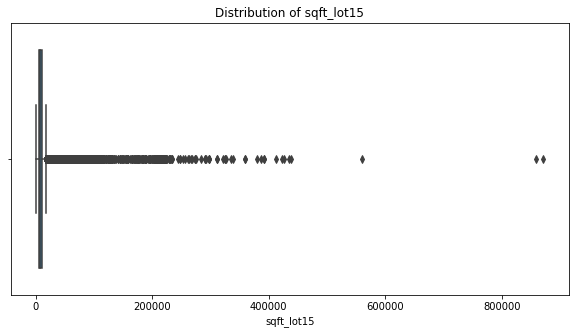

In [19]:
fig= plt.subplots(figsize=[10, 5])
sns.boxplot(data=df, x='sqft_lot15').set_title('Distribution of sqft_lot15')

In [20]:
#There seems to be very many outliers but lets count them to be sure

df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())/df.shape[0] * 100

price             5.364002
bedrooms          2.522331
bathrooms         2.642662
sqft_living       2.647290
sqft_lot         11.213958
floors            0.000000
waterfront        0.754385
view              9.825520
condition         0.138844
grade             8.844356
sqft_above        2.827787
sqft_basement     2.295552
yr_built          0.000000
yr_renovated      4.225482
zipcode           0.000000
lat               0.009256
long              1.184801
sqft_living15     2.517703
sqft_lot15       10.154117
dtype: float64

## **5.0 Exploratory Data Analysis**

### **5.1 Univariate Analysis**

This data only has numerical attributes

In [21]:
# Getting the univariate describe summary

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.401878e+05,3.369556,2.114754,2079.980238,1.511004e+04,1.494169,0.007544,0.234230,3.409404,7.656685,1788.449484,291.530754,1971.001018,84.334058,98077.941454,47.560044,-122.213889,1986.613551,12770.481835
std,3.674075e+05,0.908018,0.770252,918.521730,4.142583e+04,0.539912,0.086529,0.766185,0.650707,1.175502,828.144667,442.618452,29.371689,401.525908,53.507849,0.138579,0.140831,685.422780,27307.583622
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
# Dispersion - std, var, max, range, skew, kurtosis
d1 = pd.DataFrame( df.apply( np.std ) ).T
d2 = pd.DataFrame( df.apply( np.var ) ).T
d3 = pd.DataFrame( df.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( df.apply( lambda x: x.skew() ) ).T
d5 = pd.DataFrame( df.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d1, d4, d5] ).T.reset_index()
m.columns = ( ['columns', 'variance', 'range', 'std', 'skew', 'kurtosis'])
m

,columns,variance,range,std,skew,kurtosis
0,price,1.349820e+11,7.625000e+06,367399.006882,4.021319,34.514107
1,bedrooms,8.244594e-01,1.100000e+01,0.907997,0.518396,1.838883
2,bathrooms,5.932610e-01,8.000000e+00,0.770234,0.511081,1.279108
3,sqft_living,8.436431e+05,1.325000e+04,918.500475,1.471395,5.241880
4,sqft_lot,1.716020e+09,1.650839e+06,41424.867951,13.058402,285.006109
5,floors,2.914919e-01,2.500000e+00,0.539900,0.616270,-0.484932
6,waterfront,7.486942e-03,1.000000e+00,0.086527,11.383491,127.595686
7,view,5.870118e-01,4.000000e+00,0.766167,3.396579,10.899971
8,condition,4.234002e-01,4.000000e+00,0.650692,1.032714,0.525967
9,grade,1.381742e+00,1.200000e+01,1.175475,0.771510,1.191727


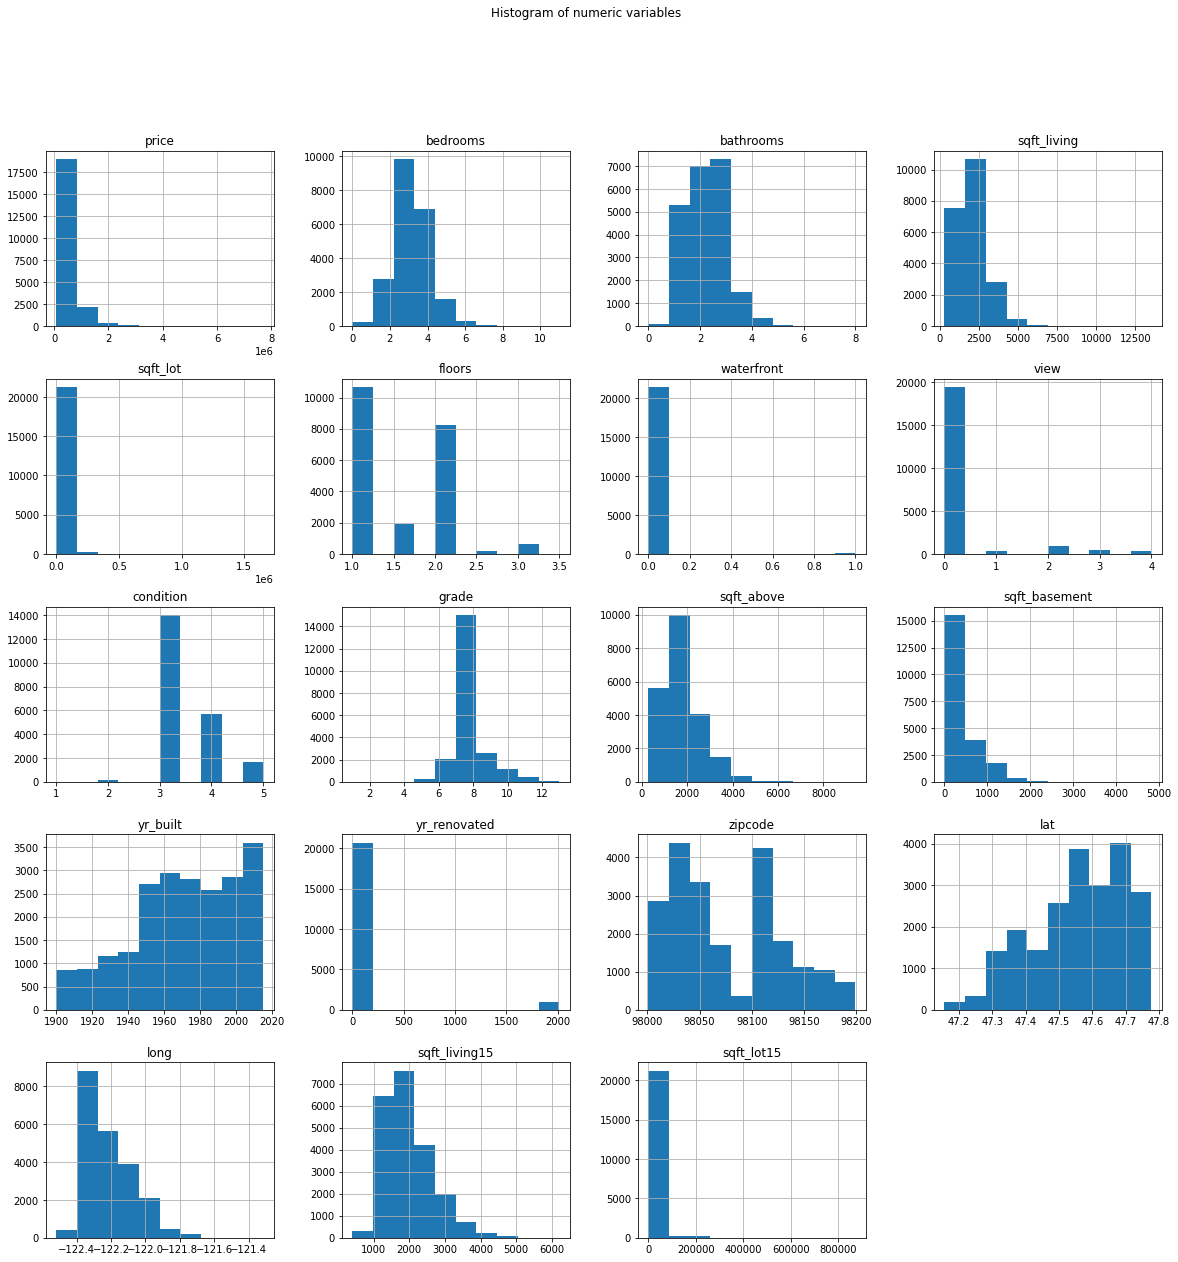

In [23]:
# Plotting the numerical variables on histogram to view their distributions.

df.hist(bins=10, figsize=(20,20))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Fifa Histogram')
plt.show()

[Text(0.5, 1.0, 'Count of houses per number of bedroom')]

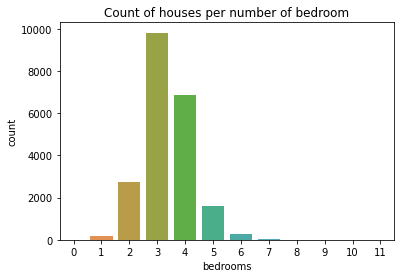

In [24]:
# Number of houses with different bedrooms
sns.countplot(x ='bedrooms', data = df).set(title='Count of houses per number of bedroom')

[Text(0.5, 1.0, 'Count of houses per number of bathrooms')]

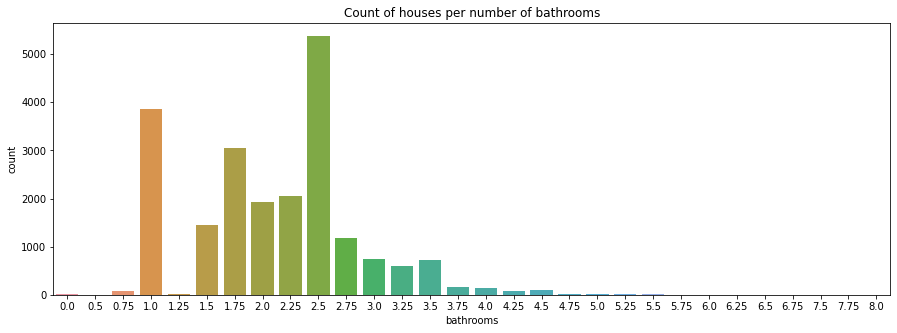

In [25]:
# Number of houses with different bedrooms
fig= plt.subplots(figsize=[15, 5])
sns.countplot(x ='bathrooms', data = df).set(title='Count of houses per number of bathrooms')

[Text(0.5, 1.0, 'Count of houses per number of floors')]

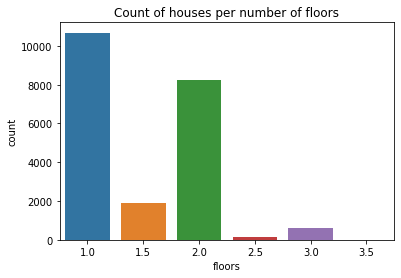

In [26]:
# Number of houses with different bedrooms
# fig= plt.subplots(figsize=[10, 5])
sns.countplot(x ='floors', data = df).set(title='Count of houses per number of floors')

[Text(0.5, 1.0, 'Count of houses with waterfront view')]

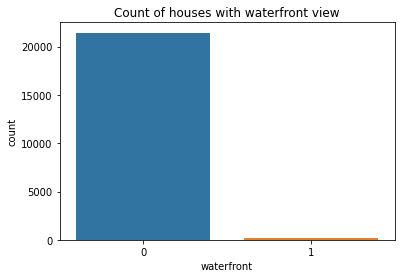

In [27]:
# Number of houses with different bedrooms
# fig= plt.subplots(figsize=[10, 5])
sns.countplot(x ='waterfront', data = df).set(title='Count of houses with waterfront view')

[Text(0.5, 1.0, 'Count of houses per number of views')]

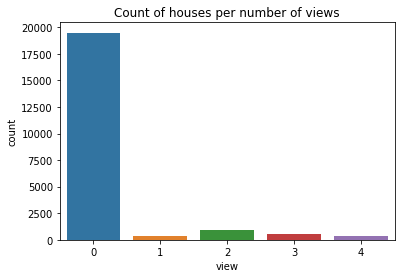

In [28]:
# Number of houses with different bedrooms
# fig= plt.subplots(figsize=[10, 5])
sns.countplot(x ='view', data = df).set(title='Count of houses per number of views')

[Text(0.5, 1.0, 'Count of houses per condition')]

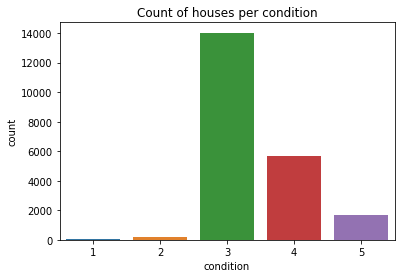

In [29]:
# Number of houses with different bedrooms
# fig= plt.subplots(figsize=[10, 5])
sns.countplot(x ='condition', data = df).set(title='Count of houses per condition')

[Text(0.5, 1.0, 'Count of houses per number of views')]

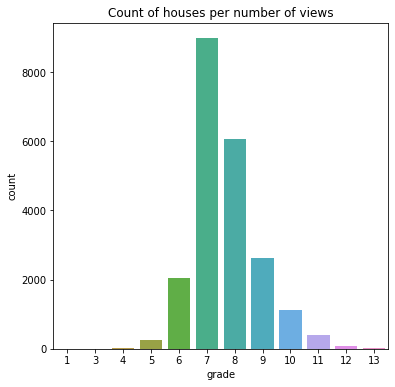

In [30]:
# Number of houses with different bedrooms
fig= plt.subplots(figsize=[6, 6])
sns.countplot(x ='grade', data = df).set(title='Count of houses per number of views')

[Text(0.5, 1.0, 'Count of houses per zipcode')]

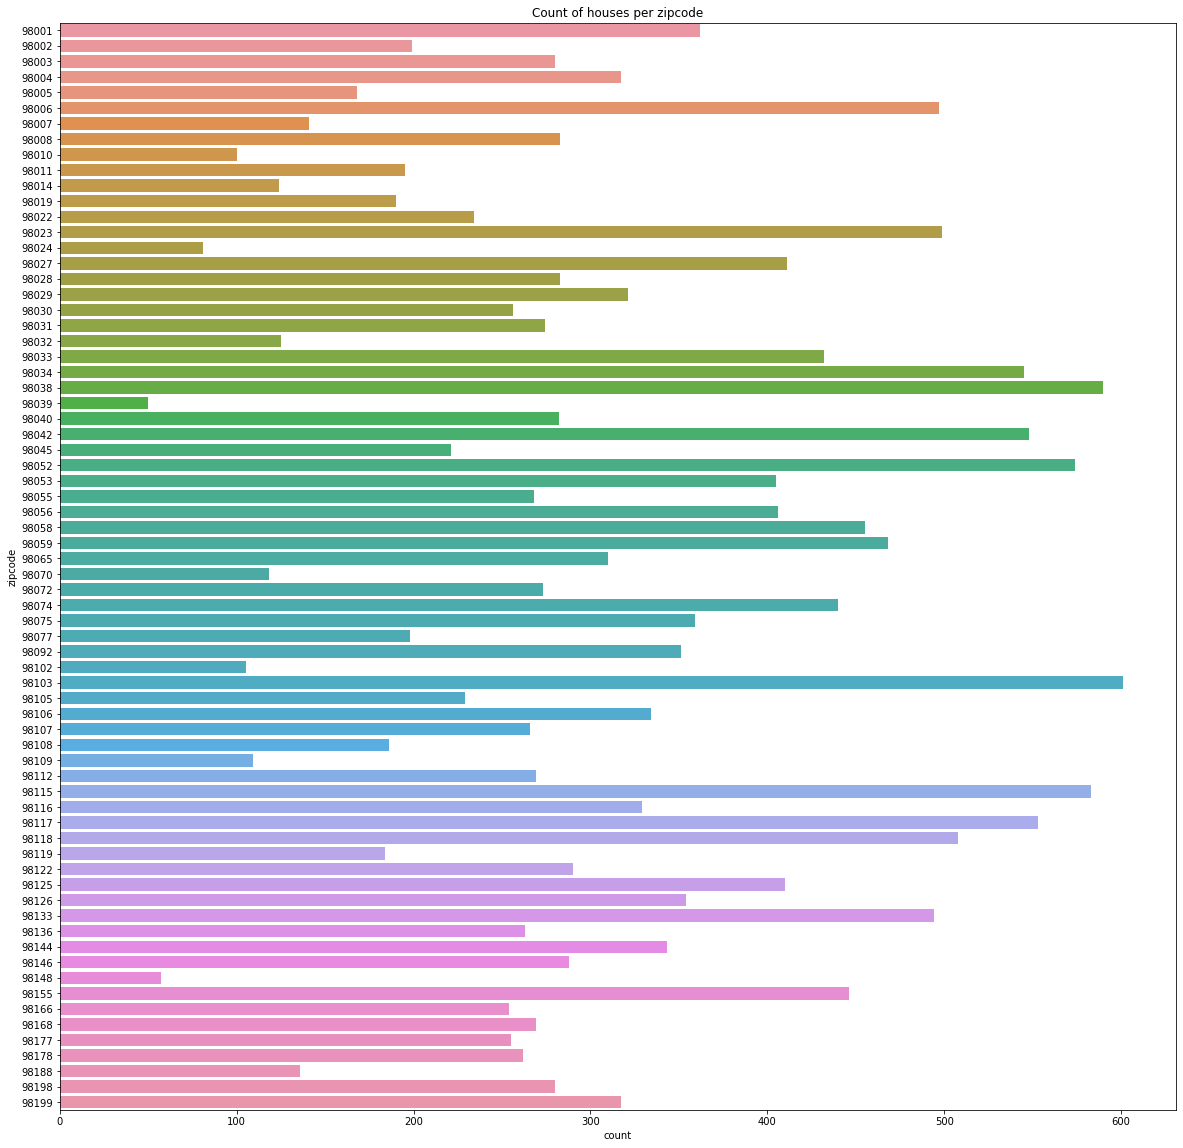

In [31]:
# Number of houses with different bedrooms
fig= plt.subplots(figsize=[20, 20])
sns.countplot(y ='zipcode', data = df).set(title='Count of houses per zipcode')

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### **5.2 Bivariate Analysis**

In [33]:
# Pair plot analysis for the whole dataframe
# sns.pairplot(df)
# plt.show()

Text(0.5, 1.0, 'Correlation between All Features')

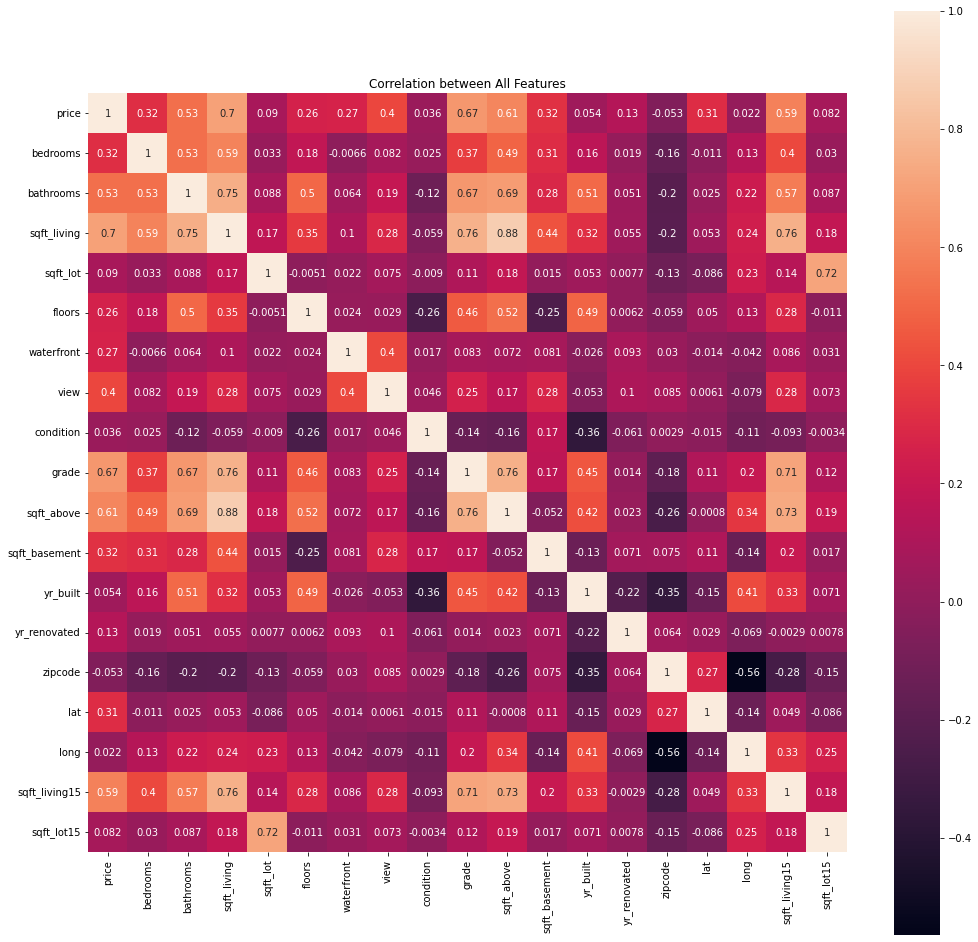

In [34]:
# Check correlation of all columns
plt.figure(figsize=(17,17))

sns.heatmap(df.corr(), square=True,annot=True)

plt.title('Correlation between All Features')

## **6.0 Linear Regression**

In [35]:
# Change zipcode to categoriacal data and encode
df_copy = df.copy()

df['zipcode'] = df['zipcode'].astype(str)

#Converting the categoricals to numericals:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['zipcode'] = label_encoder.fit_transform (df['zipcode'])

In [76]:
# Preparing the Data
# ---
# Dividing the data into attributes and labels as we did previously. 

# Removed latitude, longitude, yr_built and yr_renovated columns .. because they are not numerical values

# X = df.drop(['price'], axis = 1) , 'lat', 'long'
X =df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above',
'sqft_basement', 'zipcode','sqft_living15', 'sqft_lot15']]
y = df['price']


In [77]:
# Let's display the VIF between the variables
correlations = X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15
bedrooms,1.697,-0.430,-13.841,0.048,0.079,0.068,0.106,-0.084,0.364,11.907,6.209,0.066,0.032,0.096
bathrooms,-0.430,2.977,11.981,0.000,-0.852,-0.002,0.018,0.092,-0.480,-11.633,-6.772,0.212,0.100,0.040
sqft_living,-13.866,12.049,2303511616825040.500,-3.560,-4.489,0.808,-8.202,2.142,47.336,-2076859803765791.000,-1110019189158908.625,0.206,-24.438,-0.287
sqft_lot,0.048,0.000,-3.739,2.089,0.072,0.029,-0.060,0.015,-0.001,3.132,1.770,0.044,0.140,-1.470
floors,0.079,-0.852,-4.648,0.072,1.914,-0.008,-0.008,0.194,-0.381,3.843,2.913,-0.177,0.292,0.074
waterfront,0.068,-0.002,0.800,0.029,-0.008,1.200,-0.497,-0.005,0.048,-0.842,-0.392,0.009,0.065,-0.018
view,0.106,0.018,-8.244,-0.060,-0.008,-0.497,1.400,-0.056,-0.136,7.445,3.679,-0.156,-0.285,0.002
condition,-0.084,0.092,2.065,0.015,0.194,-0.005,-0.056,1.106,0.071,-1.904,-1.166,0.055,0.071,-0.009
grade,0.364,-0.480,47.759,-0.001,-0.381,0.048,-0.136,0.071,3.162,-44.479,-23.508,-0.025,-0.867,0.099
sqft_above,11.549,-11.950,-2076859803765789.750,2.968,3.660,-0.843,7.396,-1.972,-44.105,1872509178157837.000,1000799917193530.000,-0.192,20.454,0.058


drop sqft_basement cz it is above 5

In [78]:
X = X.drop(['sqft_basement'], axis = 1)

In [79]:
# Let's display the VIF between the variables
correlations = X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15
bedrooms,1.697,-0.430,-1.095,0.048,0.079,0.068,0.106,-0.084,0.364,0.035,0.066,0.032,0.096
bathrooms,-0.430,2.977,-1.973,0.000,-0.852,-0.002,0.018,0.092,-0.480,0.692,0.212,0.100,0.040
sqft_living,-1.095,-1.973,8.411,-0.073,1.350,-0.016,-0.597,-0.334,-1.001,-4.807,-0.453,-0.904,-0.074
sqft_lot,0.048,0.000,-0.073,2.089,0.072,0.029,-0.060,0.015,-0.001,-0.176,0.044,0.140,-1.470
floors,0.079,-0.852,1.350,0.072,1.914,-0.008,-0.008,0.194,-0.381,-1.604,-0.177,0.292,0.074
waterfront,0.068,-0.002,-0.016,0.029,-0.008,1.200,-0.497,-0.005,0.048,-0.100,0.009,0.065,-0.018
view,0.106,0.018,-0.597,-0.060,-0.008,-0.497,1.400,-0.056,-0.136,0.539,-0.156,-0.285,0.002
condition,-0.084,0.092,-0.334,0.015,0.194,-0.005,-0.056,1.106,0.071,0.260,0.055,0.071,-0.009
grade,0.364,-0.480,-1.001,-0.001,-0.381,0.048,-0.136,0.071,3.162,-0.525,-0.025,-0.867,0.099
sqft_above,0.035,0.692,-4.807,-0.176,-1.604,-0.100,0.539,0.260,-0.525,6.633,0.401,-0.764,-0.134


sqft_living has VIF of 8.706122

sqft_above has VIF of 6.957657. Drop this column

In [80]:
X = X.drop(['sqft_above', 'sqft_living'], axis = 1)

In [81]:
# Let's display the VIF between the variables
correlations = X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,sqft_living15,sqft_lot15
bedrooms,1.465,-0.753,0.006,0.128,0.049,0.059,-0.117,0.067,0.029,-0.281,0.060
bathrooms,-0.753,2.465,-0.041,-0.629,-0.019,-0.100,0.022,-0.837,0.122,-0.256,0.003
sqft_lot,0.006,-0.041,2.077,0.037,0.023,-0.054,0.016,-0.071,0.048,0.060,-1.481
floors,0.128,-0.629,0.037,1.519,-0.028,0.131,0.262,-0.455,-0.074,0.162,0.048
waterfront,0.049,-0.019,0.023,-0.028,1.197,-0.493,-0.004,0.015,0.013,0.027,-0.023
view,0.059,-0.100,-0.054,0.131,-0.493,1.347,-0.083,-0.151,-0.195,-0.284,0.006
condition,-0.117,0.022,0.016,0.262,-0.004,-0.083,1.092,0.051,0.034,0.058,-0.009
grade,0.067,-0.837,-0.071,-0.455,0.015,-0.151,0.051,2.734,-0.039,-1.335,0.041
zipcode,0.029,0.122,0.048,-0.074,0.013,-0.195,0.034,-0.039,1.131,0.304,0.080
sqft_living15,-0.281,-0.256,0.060,0.162,0.027,-0.284,0.058,-1.335,0.304,2.361,-0.220


In [88]:
# Dividing our data into training and test sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # # Standardising the X_train and the X_test to the same scale
# # #
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [89]:
# Training the Algorithm
# using the fit() method of the LinearRegression class

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [90]:
# the regression model has to find the most optimal coefficients for all the attributes.
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,6889.022
bathrooms,62032.290
sqft_lot,0.239
floors,-29428.071
waterfront,663897.230
view,65213.457
condition,65036.533
grade,145490.191
zipcode,1570.702
sqft_living15,92.355


In [91]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df_pred['Predicted'].round(7)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_pred

,Actual,Predicted
9791,216500.000,160283.816
10281,451000.000,418456.077
19859,1100000.000,1002249.293
20059,650000.000,487921.919
21204,1060000.000,956542.647
...,...,...
17763,530000.000,581437.096
13212,370000.000,373975.126
8109,440000.000,514663.761
19727,334950.000,284983.203


In [92]:
df_pred.describe()

,Actual,Predicted
count,4322.000,4322.000
mean,534668.346,538460.411
std,347822.480,272119.304
min,81000.000,-815479.945
25%,320000.000,361219.185
50%,450000.000,494398.090
75%,640750.000,667155.014
max,6890000.000,2091206.399


Our predictions seem to be close to the actual data, except for the min and max values

In [93]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))
# print('Variance score: {0:.2f}'.format(regressor.score(X, y)))

Mean Absolute Error: 154958.5100001449
Mean Squared Error: 55017936672.40389
Root Mean Squared Error: 234559.0259879246
R-Squared: 0.5451276902454001


In [94]:
# Test and Training Scores
score = regressor.score(X_train, y_train)
score2 = regressor.score(X_test, y_test)

print('Training set accuracy: ', '%.2f'%(score))
print('Test set accuracy: ', '%.2f'%(score2))

Training set accuracy:  0.57
Test set accuracy:  0.55


We can see that the value of root mean squared error is 200692.68, 
which is slightly greater than 10% of the mean value of the gas consumption in all states. 

This means that our algorithm was not very accurate but can still make reasonably good predictions.
There are many factors that may have contributed to this inaccuracy, a few of which are :
1. Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.
2. Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that. 
3. Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

**Residual plot**

In [95]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

3792.0643711453195

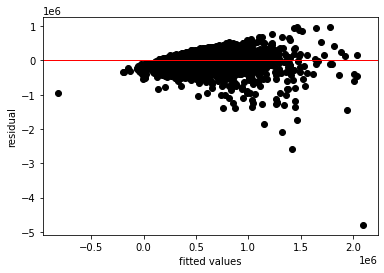

In [96]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Most of our residuals are randomnly scattered around 0, but it also tends to go out into a cone shape 

**Heteroscedacity Testing**

In [97]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


**Cross Validation**

In [98]:
from sklearn.model_selection import KFold
from sklearn import metrics

# We will use the same  independent variables for this
# X = model_df[['tournament', 'home_rank', 'away_rank']].values
# y = model_df['home_score'].values

X = df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade','yr_built', 
       'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']].values
y = df['price'].values

folds = KFold(n_splits=10)

#Printing the number of folds we will use
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1  # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))

# set up the train and test based on the split determined by KFold
# With 10 folds, we will end up with 90% of our data in the training set, and 10% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)

  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)

  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 233849.9859176558

Training model 2
Model 2 Root Mean Squared Error: 247340.8245076317

Training model 3
Model 3 Root Mean Squared Error: 215392.72042541477

Training model 4
Model 4 Root Mean Squared Error: 253048.27078939826

Training model 5
Model 5 Root Mean Squared Error: 210053.35199299094

Training model 6
Model 6 Root Mean Squared Error: 211922.9295752635

Training model 7
Model 7 Root Mean Squared Error: 207924.63306998817

Training model 8
Model 8 Root Mean Squared Error: 215010.17805652972

Training model 9
Model 9 Root Mean Squared Error: 225952.3810703063

Training model 10
Model 10 Root Mean Squared Error: 247495.9941867729


In [99]:
# Mean of RMSES
np.mean(RMSES)

226799.12695919522

From the assumptions listed above, we can see that our model satisfies the assumptions for multiple linear regression. There is no multicollinearity as evidenced by our VIF scores less than 5. The variances of our errors are also homogenous, as seen in Bartlett's test above. The residual plot above, has also shown that that our residuals are randomnly distributed. However, our RMSE is quite high for this model.

## **7.0 Quantile Regression**

In [109]:
#Performing a qauntile regression of the 50th percentile.
import statsmodels.formula.api as smf 
mod =smf.quantreg('y ~ X',df)
res = mod.fit(0.25)
res1 = mod.fit(0.5)
res2 = mod.fit(0.75)
print('25% Percentile')
print(res.summary())
print('50% Percentile')
print(res1.summary())
print('75% Percentile')
print(res2.summary())

25% Percentile
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2529
Model:                       QuantReg   Bandwidth:                   2.492e+04
Method:                 Least Squares   Sparsity:                    3.703e+05
Date:                Sat, 11 Jun 2022   No. Observations:                21607
Time:                        20:28:33   Df Residuals:                    21593
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -380.5633   9.89e+04     -0.004      0.997   -1.94e+05    1.93e+05
X[0]        7665.4148   1457.926      5.258      0.000    4807.772    1.05e+04
X[1]        2.368e+04   2255.583     10.497      0.000    1.93e+04    2.81e+04
X[2]           0.1918      0.039     

Mean Absolute Error: 154958.5100001449
Mean Squared Error: 55017936672.40389
Root Mean Squared Error: 234559.0259879246
R-Squared: 0.5451276902454001

## **8.0 Ridge Regression**

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X =df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above',
'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']]
# X =df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade','yr_built', 
#        'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']]
y = df['price']

# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [113]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 0.38 is worse than what the baseline model was. 

47283231033.89476

In [114]:
search.best_params_

{'alpha': 0.01}

In [115]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

46643356006.004295


In [116]:
# The 0.35 is lower than the 0.38. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': 110421.76005735941,
 'bedrooms': -8514.905677731978,
 'condition': 149200.75308622647,
 'floors': 595695.0884721633,
 'grade': -4268.352780689699,
 'sqft_above': 13.3049846363175,
 'sqft_basement': 16.123560003627006,
 'sqft_living': 0.1418658264883561,
 'sqft_lot': 14810.397156312461,
 'view': 22818.367306003733,
 'waterfront': 48543.77749239593,
 'yr_built': 105.90317830075946,
 'yr_renovated': -0.39715584403893445}

Mean Absolute Error: 154958.5100001449

Mean Squared Error: 55017936672.40389

Root Mean Squared Error: 234559.0259879246

R-Squared: 0.5451276902454001

## **9.0 Lasso Regression**

In [118]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X =df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above',
'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']]
# X =df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade','yr_built', 
#        'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']]
y = df['price']

# Scaling data 
#
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [119]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6545090965295892
lasso MSE: 46635063586.06289
lasso coef: [-4.31811282e+04  4.69871454e+04  2.98585964e+02 -4.70557656e-03
  2.67985425e+04  5.76996037e+05  4.31205432e+04  1.94819092e+04
  1.19227065e+05 -1.35414904e+02 -1.29145340e+02 -3.58299553e+03
  1.01169999e+01 -1.26883795e+01  2.48534432e+01 -5.56738815e-01]


In [120]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 0.1}
lasso score: 0.6608198643702232
linear score: 0.6608197641185475
lasso MSE: 45758201869.73727
linear MSE: 45758215394.51639
lasso best estimator coef: [-4.62224153e+04  4.55114047e+04  3.00940638e+02  5.58933925e-02
  2.84560123e+04  5.93751288e+05  3.94734628e+04  1.93039070e+04
  1.20207166e+05 -1.36563283e+02 -1.25009602e+02 -3.58022961e+03
  1.23957419e+01 -5.67525107e+01  2.27987486e+01 -6.06234170e-01]
linear coef: [-4.62225689e+04  4.55118310e+04  1.13435937e+02  5.58941024e-02
  2.84564698e+04  5.93766136e+05  3.94729053e+04  1.93041735e+04
  1.20207301e+05  5.09409827e+01  6.24949546e+01 -3.58023521e+03
  1.23954813e+01 -5.67552502e+01  2.27987691e+01 -6.06233977e-01]


The mean squared error of the linear and lasso regression are almost similar

## **10.0 Elastic Net Regression**

In [121]:
# Importing our libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [133]:
# Data preparation
# 
X =df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above',
'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']]
# X =df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade','yr_built', 
#        'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15']]
y = df['price']

# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
first_model1 =(metrics.r2_score(y_true=y,y_pred=regression.predict(X)))
print('Mean Squared Error :', first_model)
print('R Squared :', first_model1)

# This mean standard error score of 46635063424.38999 is our benchmark for determining 
# if the elastic net model will be better or worst.

Mean Squared Error : 46635063424.38999
R Squared : 0.6545090977273258


In [123]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 46991.354556359285,
 'bedrooms': -43182.560326782856,
 'condition': 19484.551519536817,
 'floors': 26803.256441722508,
 'grade': 119228.56235286364,
 'sqft_above': 52.29791688712248,
 'sqft_basement': 58.57049327646837,
 'sqft_living': 110.86841003193331,
 'sqft_living15': 24.85390892255691,
 'sqft_lot': -0.0046978880927781574,
 'sqft_lot15': -0.5567380096363195,
 'view': 43114.93899966708,
 'waterfront': 577148.7329783371,
 'yr_built': -3583.055269859747,
 'yr_renovated': 10.114326365957425,
 'zipcode': -12.718649271870703}

In [124]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [125]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

47336571409.167564

In [126]:
print("elastic net best parameters:", search.best_params_)

lasso best parameters: {'alpha': 1e-05, 'l1_ratio': 0.8}


In [131]:
# The best hyperparameters was an alpha set to 1e-05, and a l1_ratio of 0.8. 
# With these settings we got an MSE of 1.08. This is above our baseline model of MSE 47336571409.167564  for the 
# baseline model (46635063424.38999) 
# Which means that elastic net is doing worse than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
second_model1 =(metrics.r2_score(y_true=y,y_pred=elastic.predict(X)))
print('Mean Squared Error :', second_model)
print('R Squared :', second_model1)

Mean Squared Error : 46764216814.72596
R Squared : 0.653552278585628


The mean squared error for elastic net **46764216814.72596** is worse than that of our linear regression **46635063424.38999** 

In [74]:
# Below are the coefficients
# 
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficients are mostly the same. 
# Notice that occupation was completely removed from the model in the elastic net version. 
# This means that this values was no good to the algorithm. Traditional regression cannot do this.

{'bathrooms': 44318.89057816414,
 'bedrooms': -37666.38749510622,
 'condition': 21959.532588337654,
 'floors': 26711.22842544869,
 'grade': 108622.84064083843,
 'sqft_above': 76.93189275448884,
 'sqft_basement': 84.13726952998029,
 'sqft_living': 82.07491646290312,
 'sqft_living15': 34.604859341206705,
 'sqft_lot': -0.004944301609096113,
 'sqft_lot15': -0.5147973119736884,
 'view': 44947.72081756392,
 'waterfront': 556922.7635172363,
 'yr_built': -3209.4057175509265,
 'yr_renovated': 16.37108154985769,
 'zipcode': 126.77702968626078}

Mean Absolute Error: 154958.5100001449

Mean Squared Error: 55017936672.40389

Root Mean Squared Error: 234559.0259879246

R-Squared: 0.5451276902454001